# K-Means Clustering

## Theory
K-Means is one of the most popular clustering algorithms in unsupervised learning.
It partitions data into **k clusters** by minimizing the variance within each cluster.
Each cluster is represented by its centroid (mean of points within the cluster).

### Working Steps
1. Choose the number of clusters `k`.
2. Initialize `k` centroids randomly.
3. Assign each data point to the nearest centroid (cluster assignment).
4. Recalculate centroids as the mean of assigned points.
5. Repeat steps 3–4 until centroids stop changing (convergence).



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [17]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [20]:
X_with_clusters = pd.DataFrame(X_scaled, columns=data.feature_names)
X_with_clusters["Cluster"] = labels
print(X_with_clusters.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0          -0.900681          1.019004          -1.340227         -1.315444   
1          -1.143017         -0.131979          -1.340227         -1.315444   
2          -1.385353          0.328414          -1.397064         -1.315444   
3          -1.506521          0.098217          -1.283389         -1.315444   
4          -1.021849          1.249201          -1.340227         -1.315444   

   Cluster  
0        1  
1        2  
2        2  
3        2  
4        1  


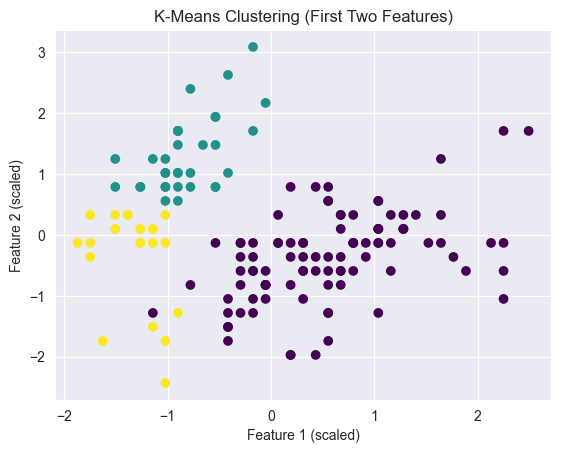

In [21]:
plt.scatter(X_with_clusters.iloc[:, 0], X_with_clusters.iloc[:, 1],
            c=X_with_clusters["Cluster"], cmap="viridis")
plt.title("K-Means Clustering (First Two Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

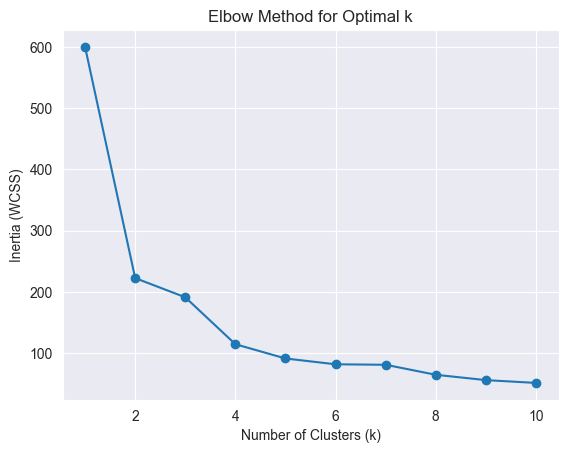

In [22]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.plot(k_values, inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.show()

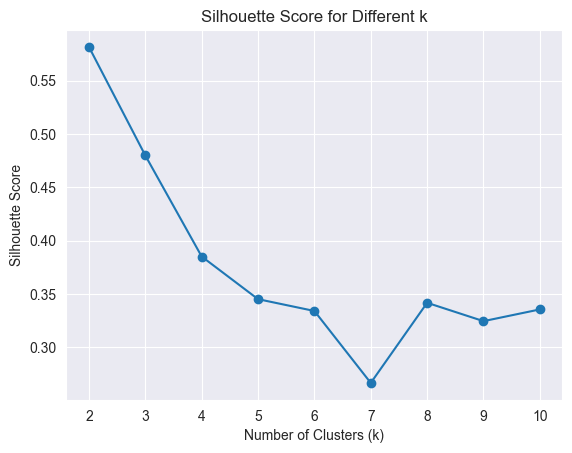

In [23]:
from sklearn.metrics import silhouette_score
silhouette_scores = []
for k in range(2, 11):  # silhouette not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker="o")
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()